<a href="https://colab.research.google.com/github/kkmax-develop/FruitDiscrimination/blob/master/Sample_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPUが割り当てられているかチェック
import tensorflow as tf
tf.test.gpu_device_name()

''

### **ライブラリのインポート**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

#画像認識関連ライブラリ
from tensorflow import keras
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization, Reshape
from tensorflow.keras.models import Sequential, Model

### **データの前処理**

ImageDataGeneratorクラスのインスタンスを作成。各引数の意味は公式ドキュメントを参照。

https://keras.io/ja/preprocessing/image/

In [3]:
# データ拡張の定義。trainデータとvalidationデータは9：1で設定。
datagen = image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 30,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.1
        )

In [4]:
# ImageDataGeneratorを使用してデータの読み込みと拡張
batch_size = 10000
IMG_WIDTH = 100
IMG_HEIGHT = 100
CHANNELS = 3
train_dir = "/content/drive/My Drive/Colab Notebooks/FruitDiscrimination/data/training"
TARGET = ["Apple Golden 1","Avocado","Banana","Blueberry","Cherry 1","Grape Pink","Kaki",
         "Lemon","Mango","Onion Red","Peach","Strawberry","Tomato 1"]

train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            classes=TARGET,
            subset = "training" 
        )

Found 5841 images belonging to 13 classes.


In [5]:
# validationデータの読み込み
validation_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            classes=TARGET,
            subset = "validation" 
        )

Found 646 images belonging to 13 classes.


In [7]:
# numpy配列へ変換(CNN等へ読み込ませる場合は不要)
X_train, y_train = train_generator.next()
X_val, y_val = validation_generator.next()

In [8]:
# 入力画像を行列(100x100x3)からベクトル(長さ30000)に変換
X_train = X_train.reshape(-1, 30000)
X_val = X_val.reshape(-1, 30000)

### **モデル作成**

In [22]:
# 3層のニューラルネットワークを作成
model = Sequential()

# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, activation='relu', input_shape=(30000,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=13, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               7680256   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_8 (Dense)              (None, 13)                1313      
Total params: 7,707,269
Trainable params: 7,707,269
Non-trainable params: 0
_________________________________________________________________


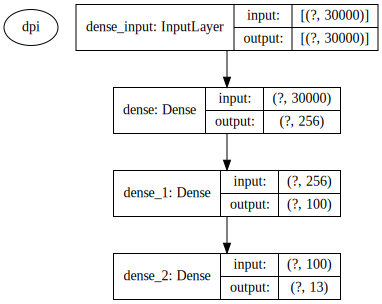

In [10]:
# 作成したモデルの可視化
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

### **学習**

In [27]:
# モデルの学習方法について指定
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

epochs = 100

# 学習 
result = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=epochs,
                   validation_data=(X_val, y_val),
                  )

Epoch 1/100
46/46 [==============================] - 4s 85ms/step - loss: 204.7101 - accuracy: 0.4304 - val_loss: 24.9360 - val_accuracy: 0.6130
Epoch 2/100
46/46 [==============================] - 4s 83ms/step - loss: 14.2389 - accuracy: 0.7283 - val_loss: 17.2132 - val_accuracy: 0.7214
Epoch 3/100
46/46 [==============================] - 4s 84ms/step - loss: 12.2603 - accuracy: 0.7632 - val_loss: 9.9046 - val_accuracy: 0.8189
Epoch 4/100
46/46 [==============================] - 4s 84ms/step - loss: 5.5789 - accuracy: 0.8517 - val_loss: 9.2850 - val_accuracy: 0.8204
Epoch 5/100
46/46 [==============================] - 4s 83ms/step - loss: 5.8997 - accuracy: 0.8398 - val_loss: 9.3075 - val_accuracy: 0.8375
Epoch 6/100
46/46 [==============================] - 4s 83ms/step - loss: 5.3065 - accuracy: 0.8574 - val_loss: 9.9907 - val_accuracy: 0.8235
Epoch 7/100
46/46 [==============================] - 4s 83ms/step - loss: 8.1798 - accuracy: 0.8129 - val_loss: 6.4383 - val_accuracy: 0.8777


In [24]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### **学習状況の可視化**

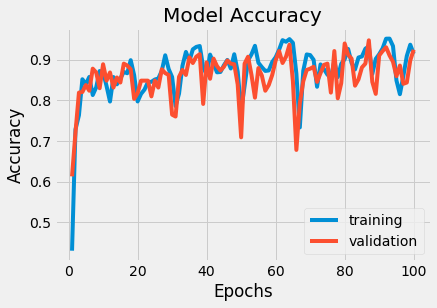

In [28]:
plt.style.use('fivethirtyeight')
plt.title('Model Accuracy')
plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

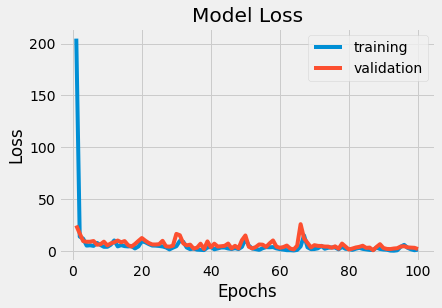

In [29]:
plt.style.use('fivethirtyeight')
plt.title('Model Loss')
plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()